#### The following code is property of UpTahr Analytics. 
#### This is intended for educational/demostration purposes only, and may not be used by another business/commerce activity
---
---

## The Scenario:
### Imagine your company is ready to release a unique product for its first generation. The product is disruptive and has a niche that your firm feels will be the new standard in the product-consumer space. Everyone in your team is filled with excitement, but critical questions still loom: 
#### - “What will be the magnitude of your cost of goods purchase orders?” asks the supply chain
#### - “What will be the scale of our market share?”  asks the investors
#### - “What budget should we set for advertisement?” asks the marketing team
#### - “How long will the product’s generational lifetime be?” asks the R&D department
### Answering these difficult questions are a big challenge in any company, but luckily the tool of market diffusion forecasting exists to help minimize the guessing game in these scenarios. 
---

## What is product adoption?
As a given type of product market evolves, key innovations occur which milestones a new class of the product for that market. In 1948 the dawn of automatic coffee makers gave rise to the expectation of finding one in most homes by the 1960s. In 2011 the inception of smart phones began, giving rise to the handheld computers found in everyone’s pockets today. These types of products are known as consumer durables because they do not need to be purchased often, and typically tend to last for at least 3 years. 
When a new durable comes to the consumer market it is important to identify how quickly, and in what magnitude, consumers will initially purchase, or uptake, the product. Product adoption is an essential driving force for marketing KPIs like customer lifetime value (CLV), which ultimately reflects how much a consumer values a product within their lifestyle. Products naturally undergo a lifecycle where they begin with an innovative edge and eventually end production when they reach a level of obsolescence. The ability to understand your product’s growth timeline and track important metrics such as peak yearly sales are essential to forecasting profitability, optimizing marketing expenses, and minimizing losses. 


## How does market diffusion forecasting work?
Market diffusion is the process by which a new idea or product is adopted by the consumer market. The underlying impetus to customer adoption is the Bass Model, introduced by Frank Bass in 1969. The traditional Bass Diffusion model relies on the assumption that the timing of a customer’s initial purchase is related to the number of previous buyers of that product. This market relationship solely depends on three coefficients: consumer market share (m), innovator consumers (p), and imitator consumers (q). 


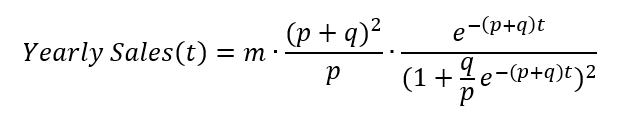

In [49]:
from IPython.display import Image
Image(filename='Bass Eqn.PNG')

The Bass Diffusion model has shown forecasting accuracy in the consumer adoption of durables (search goods) where the number of users is roughly equal to the number of product sales. The strategy for optimizing the model boils down to the values chosen for the m, p, and q coefficients. These coefficients are typically calculated using least squares regression analysis and can resemble a product’s yearly sales accurately when the product is towards the end of its life cycle. But what does a producer do when they want to predict the sales, and ultimately profitability of a new and disruptive product?

### __Enter the Monte Carlo Simulation,__ 
#### a modeling method which utilizes thousands to millions of potential sales outcomes to determine the most likely scenario. 

#### __By implementing the Monte Carlo technique in the Bass Diffusion model, a new product sales lifecycle can be forecasted before sales begin!__

In [ ]:
import os
print('[change directory]')
os.path.dirname(os.path.abspath("__file__"))
print('getcwd:      ', os.getcwd())

### Before we can run a Monte Carlo simulation for the Bass Diffusion Model, me must obtain some m, p, and q values. This is done using the Scikit-Learn Least Squares algorith in the cell below:


m =  67980.90740311598 ;  p =  0.006593955391704167 ;  q =  0.6380913004242544


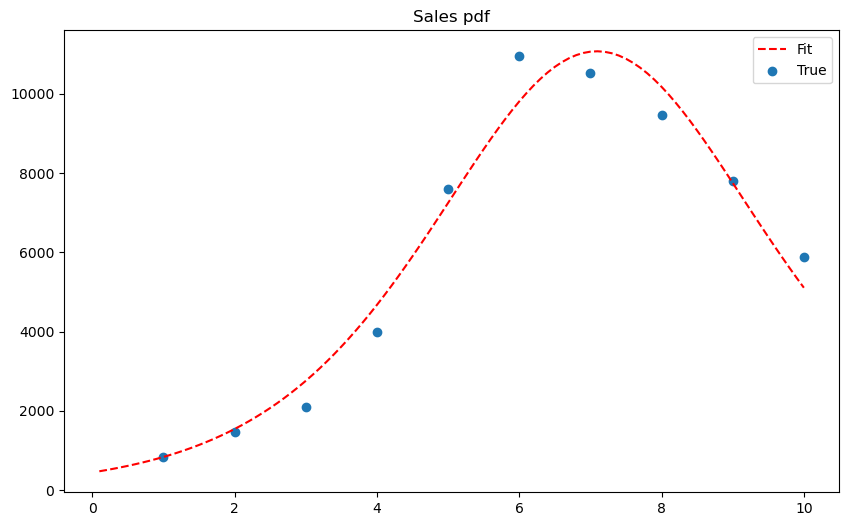

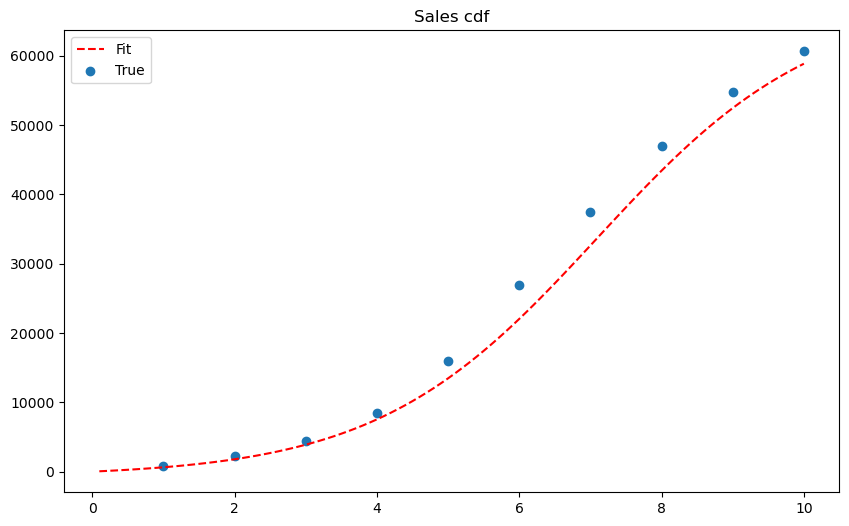


Actual Sales: 
 [  840  1470  2110  4000  7590 10950 10530  9470  7790  5890] 
Least Curve Predicted Sales: 
 [448.2630709037183, 838.5127904764535, 1543.2586927197997, 2757.024419038841, 4671.772061859722, 7243.781776115076, 9803.312393776618, 11059.99406011379, 10173.772603508707, 7750.574832785242]
R-Squared of Sales Fit:  0.7142823203099873
R-Squared of Cumulative Sales Fit:  0.9208695756669373


In [29]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
import matplotlib.pyplot as plt
import numpy as np

look = 3 #time duration of look ahead (same time interval as sales data)

# sales vector
sales=np.array([840, 1470, 2110, 4000, 7590, 10950, 10530, 9470, 7790, 5890])#
#Hyundai Elantra Gen 1 Yearly Sales (Start 2007)
#sales=np.array([117760, 171605, 152741, 113368, 64363, 34454, 32236])

# cumulatice sales
c_sales=np.cumsum(sales)
#time intervals
t= np.linspace(1.0, float(len(sales)), num=int(len(sales)))
# initial variables(M, P & Q)
vars = [733049, 0.103,0.6835]

# residual (error) function
def residual(vars, t, sales):
    M = vars[0]
    P = vars[1]
    Q = vars[2]
    Bass = M * (((P+Q)**2/P)*np.exp(-(P+Q)*t))/(1+(Q/P)*np.exp(-(P+Q)*t))**2 
    return (Bass - (sales))
                 
# non linear least square fitting
varfinal,success = leastsq(residual, vars, args=(t, sales))

# estimated coefficients
m = varfinal[0]
p = varfinal[1]
q = varfinal[2]
print("\nm = ", m ,";  p = ", p ,";  q = ", q)

#time interpolation
tp=(np.linspace(1.0, 100.0, num=100))/10

cofactor= np.exp(-(p+q) * tp)

# Yearly Sales (pdf)
sales_pdf= m* (((p+q)**2/p)*cofactor)/(1+(q/p)*cofactor)**2

plt.figure(figsize=(10,6))
plt.plot(tp, sales_pdf,color='red', linestyle='dashed')
plt.scatter(t,sales)
plt.title('Sales pdf')
plt.legend(['Fit', 'True'])
plt.show()


# Cumulative sales (cdf)
sales_cdf= m*(1-cofactor)/(1+(q/p)*cofactor)

plt.figure(figsize=(10,6))
plt.plot(tp, sales_cdf, color='red', linestyle='dashed')
plt.scatter(t,c_sales)
plt.title('Sales cdf')
plt.legend(['Fit', 'True'])
plt.show()
#calc_vars = [60630, 0.03,0.38]

sales_ti = []
csales_i = []
for ti in range(0,len(sales+2)+look):
    cofactor= np.exp(-(p+q) * ti)
    # Yearly Sales (pdf)
    sales_i= m* (((p+q)**2/p)*cofactor)/(1+(q/p)*cofactor)**2
    sales_ti.append(sales_i)
csales_i = np.cumsum(sales_ti)
print("\nActual Sales: \n", sales, "\nLeast Curve Predicted Sales: \n", sales_ti[0:len(sales)])

r2_sales = r2(sales,sales_ti[0:len(sales)])
print("R-Squared of Sales Fit: ", r2_sales)

r2_csales = r2(c_sales,csales_i[0:len(sales)])
print("R-Squared of Cumulative Sales Fit: ", r2_csales)

In [12]:
#Import Libraries
import numpy as np  
import pandas as pd  
import pandas_datareader as wb  
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.axes.Axes as axes
from scipy.stats import norm

mpl.style.use('default') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


For the simulation seen in the plot in the output of the cell below, each scenario was produced by initially choosing p & q coefficients at random from a normal (bell shaped) distribution. Then, for each interval in time a factor of drift and Brownian motion is applied to emulate the naturally random variation that occurs in the sales of a product from year to year. This is the same approach used to apply Monte Carlo Simulations to stock market forecasts. The three random components to the model are then weighted to reflect the proper level of variability expected within a market. These weightings help predict worst- & best-case scenarios.

### Once the simulation has run for 100,000 iterations (this can be time consuming on the order of 10 minutes) an average sales line can be produced from which we are able to gain the valuable yearly sales forecast we were after.

### The variable _look_ allows us to project sales futher than the time frame of the provided data. This is exceptionally useful for a new product when few annual sales data point exist.


Bass Coefficients:  
m: 	 67980.90740311598 
p: 	 0.006593955391704167 
q: 	 0.6380913004242544

Yearly Sales Percent Change Statistics

Mean: 		 0.21640104275647476 
Variance: 	 0.13814222008848334 
Drift: 		 0.1473299327122331 
StDv: 		 0.37167488493101514

Sales Data: 
 [    0   840  1470  2110  4000  7590 10950 10530  9470  7790  5890] 

Sales Sims: 
 [[   0.          781.69812713 1369.21356912 ... 6229.20791107
  2454.61916876 1754.48393566]
 [   0.         1434.99803209 1649.68625711 ... 3220.62911361
  2338.99037863 1111.26702725]
 [   0.          415.09128269 1615.69325507 ... 3829.9380274
  2671.02072494  820.38089787]
 ...
 [   0.          812.76137557 1709.37198953 ... 6364.81413544
  3213.07995187 4920.26267254]
 [   0.          756.9677794   932.67123773 ... 6363.92154747
  3061.73507527 2566.93287701]
 [   0.          945.92353399 2420.85449441 ... 7232.94952343
  2149.64189876 1611.52394864]] 



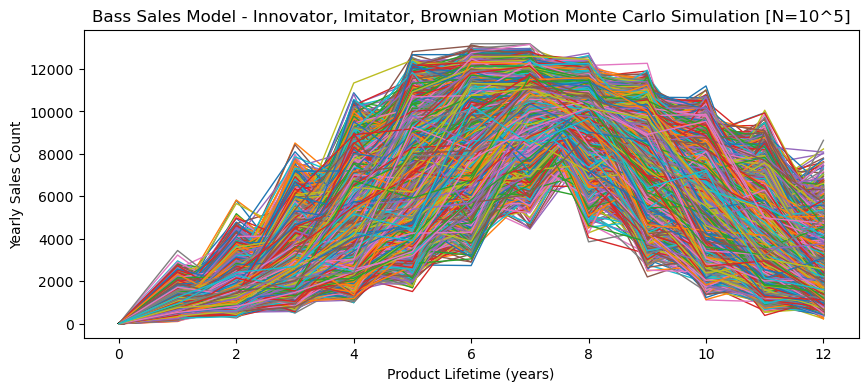


Cumulative Sales Data: 
 [    0   840  2310  4420  8420 16010 26960 37490 46960 54750 60640] 

Cumulative Sales Sims: 
 [[    0.           781.69812713  2150.91169625 ... 56121.5696553
  58576.18882406 60330.67275973]
 [    0.          1434.99803209  3084.6842892  ... 53662.21558993
  56001.20596856 57112.47299581]
 [    0.           415.09128269  2030.78453776 ... 62737.41548723
  65408.43621217 66228.81711004]
 ...
 [    0.           812.76137557  2522.1333651  ... 58149.45952619
  61362.53947806 66282.8021506 ]
 [    0.           756.9677794   1689.63901713 ... 64588.97954
  67650.71461527 70217.64749227]
 [    0.           945.92353399  3366.77802839 ... 57759.49923866
  59909.14113741 61520.66508605]] 



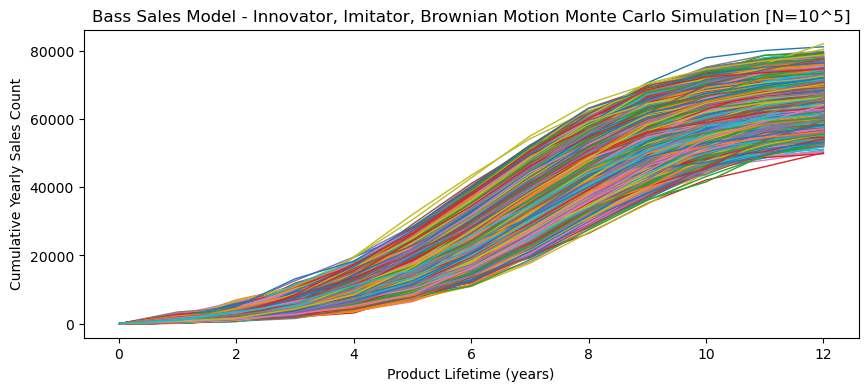


Sim Computation Time: 12.977 minutes (778.609375 seconds)


In [50]:
#simulation timer
import time

time_start = time.process_time()

#M,P,Q Variables obtained from Least Squares Fit Above
m = m
pi = p
qi = q
# pi = 0.00659 #p average, often p < 0.01
# qi = 0.63809 #q average, often 0.3 < q < 0.5
# m = 67980.91 #market potential
print("\nBass Coefficients: ","\nm: \t", m,"\np: \t", p,"\nq: \t", q)

sales_df = pd.DataFrame(sales)
sales_0 = np.append([0],sales)
csales_0 = np.cumsum(sales_0)

log_returns = np.log(1 + sales_df.pct_change())

#Stats & Drift from data
u = log_returns.mean()[0]
var = log_returns.var()[0]
drift = u - (0.5 * var)
stdev = log_returns.std()[0]
print("\nYearly Sales Percent Change Statistics""\n\nMean: \t\t",u,"\nVariance: \t", var,"\nDrift: \t\t",drift,"\nStDv: \t\t",stdev)


#Simulation Parameters
#t_len = 10 #time duration
it = 100000 #number of simulations
look = 2 #time duration of look ahead (same time interval as sales data)



tint = 1 #time interpolation fraction
if tint == 1:
    tinterval = "Year"
elif tint == 12:
    tinterval = "Month"

sim_dur = np.zeros((len(sales_0) + look)*tint)
    
sims_s = np.zeros_like(sim_dur,shape=(it, len(sim_dur))) #yearly sales sim list to store each sales simulation's list
sims_f = np.zeros_like(sim_dur,shape=(it, len(sim_dur))) #cumulative yearly sales sim list to store cumulative sales simulation arrays
for i in range(it):
    
    sales_t = np.zeros_like(sim_dur) #create zero array with same length of sales data
    csales_t = np.zeros_like(sim_dur) #create zero array with same length of sales data
    
    #Random (Normal Distribution) Variability in q (Immitators) with w (weighting factor):
    Zp = 1 #weighting factor
    pt = pi*(1+(Zp)*np.random.normal(loc=0, scale=0.1)) #selects random +/- change in initial p from norm dist about 0 within 0.1 sigma
    #p = np.random.normal(loc=pi, scale=.1) #selects random number in norm dist about initial p within 0.1 sigma
    
    #Random (Normal Distribution) Variability in q (Immitators) with w (weighting factor):
    Zq = 0.5 #weighting factor
    qt = qi*(1+(Zq)*np.random.normal(loc=0, scale=0.1)) #selects random +/- change in initial q from norm dist about 0 within 0.1 sigma
    #q = np.random.normal(loc=qi, scale=.1) #selects random number in norm dist about initial q within 0.1 sigma
    
    for t in range (1,len(sim_dur)):
        
        #Yearly Sales with generated random samples from the standard normal distribution, 
        #using the inverse transform method; with Z (weighting factor):
        Ze = 1
        cofactor= np.exp(-(pt+qt) * (t/tint)+Ze*(drift + stdev*norm.ppf(np.random.rand())))
        s = m* ((((pt+qt)**2/pt)*cofactor)/(1+(qt/pt)*cofactor)**2)
        sales_t[t] = (s) #add datapoint to this simulation sales_t list
        csales_t[t] = np.sum(sales_t) #add datapoint to this simulation sales_t list
    #print("\nsales_t: ",sales_t)      
    sims_s[i] = sales_t #add each simulations sales data to yearly sales sim list
    sims_f[i] = csales_t #add each simulations sales data to cumulative yearly sales sim list
    
print("\nSales Data: \n",sales_0, "\n\nSales Sims: \n",sims_s,"\n")
#Plot Yearly Sales Simulations:
plt.figure(figsize=(10,4))
#plt.grid(b=None)#,axis='both')
for _ in range (it):
    plt.plot(sims_s[_], linewidth=1)
plt.title('Bass Sales Model - Innovator, Imitator, Brownian Motion Monte Carlo Simulation [N=10^5]')
plt.xlabel('Product Lifetime (years)')
plt.ylabel('Yearly Sales Count')
#plt.grid(b=None)#,axis='both')
plt.savefig('sales_p_q_drift_brownian_mc.png', bbox_inches='tight')
plt.show()
print("\nCumulative Sales Data: \n",csales_0,"\n\nCumulative Sales Sims: \n",sims_f,"\n")
#Plot Cummulative Sales Simulations:
plt.figure(figsize=(10,4))
for _ in range (it):
    plt.plot(sims_f[_], linewidth=1)
plt.title('Bass Sales Model - Innovator, Imitator, Brownian Motion Monte Carlo Simulation [N=10^5]')
plt.xlabel('Product Lifetime (years)')
plt.ylabel('Cumulative Yearly Sales Count')
plt.savefig('cumusales_p_q_drift_brownian_mc.png', bbox_inches='tight')
plt.show()

#stop timer
time_elapsed_seconds = (time.process_time() - time_start)
time_elapsed_minutes = np.round((time_elapsed_seconds / 60), 3)
print("\nSim Computation Time: " + str(time_elapsed_minutes) + " minutes (" + str(time_elapsed_seconds) + " seconds)")

In [14]:
#Write Simulations to CSV files
import numpy as np
import os
from datetime import datetime
now = datetime.now() # current date and time
date_time = now.strftime("%m%d%Y_%H%M%S")
outpath = "MC_Output_" + date_time + "/" # create directory
if not os.path.exists(outpath):
    os.makedirs(outpath)
    
#Create header
MC_header = []
for _ in range (0,len(sim_dur)): MC_header.append(str(_))
MC_header = str(MC_header).replace("'","")
MC_header = MC_header.replace("[","")
MC_header = MC_header.replace("]","")

#Writing outputss to csv files in the "MC_Output" Folder
#Sales    
salespath = tinterval + "ly_Sales_Data_" + "(N=" + str(it) + ")_" + date_time + ".csv" # create sales data filename
np.savetxt(outpath + salespath, sims_s, delimiter=",", header = MC_header, fmt="%i", comments='') # write sales sims to csv 
#Cumu Sasles
cumusalespath = "Cumulative_" + tinterval + "ly_Sales_Data_" + "(N=" + str(it) + ")_" + date_time + ".csv" # create cumu sales data filename
np.savetxt(outpath + cumusalespath, sims_f, delimiter=",", header = MC_header, fmt="%i", comments='') # write cumu sales sims to csv

### Lets take a look at the distributions and verify their bell shape (normal distribution)

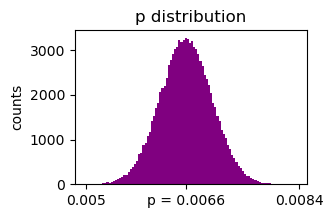

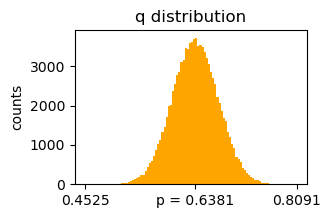

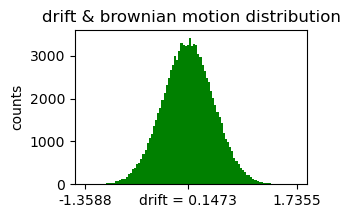

In [53]:
#print distributions cell
a=[]
for i in range(100000) : 
    #Random (Normal Distribution) Variability in q (Immitators) with w (weighting factor):
    Zp = 10 #weighting factor
    pd = p*(1+(Zp)*np.random.normal(loc=0, scale=.95*p)) #selects random +/- change in initial p from norm dist about 0 within 2 sigma
    a.append(pd)
plt.figure(figsize=(3,2))
plt.hist(a, bins=100, color = 'purple')
plt.title('p distribution')
plt.ylabel('counts')
xtika = [np.round(min(a),4), np.round(p,4), np.round(max(a),4)]; xtiklaba = [str(xtika[0]),'p = '+str(xtika[1]),str(xtika[2])]
plt.xticks(ticks=xtika, labels=xtiklaba)
plt.savefig('p_distribution.png', bbox_inches='tight')
plt.show()


b=[]
for i in range(it) : 
    #Random (Normal Distribution) Variability in q (Immitators) with w (weighting factor):
    Zq = .1 #weighting factor
    qd = q*(1+(Zq)*np.random.normal(loc=0, scale=.95*q)) #selects random +/- change in initial p from norm dist about 0 within 2 sigma
    b.append(qd)
plt.figure(figsize=(3,2))
plt.hist(b, bins=100, color = 'orange')
plt.title('q distribution')
plt.ylabel('counts')
xtikb = [np.round(min(b),4), np.round(q,4), np.round(max(b),4)]; xtiklabb = [str(xtikb[0]),'p = '+str(xtikb[1]),str(xtikb[2])]
plt.xticks(ticks=xtikb, labels=xtiklabb)
plt.savefig('q_distribution.png', bbox_inches='tight')
plt.show()

(drift + stdev*norm.ppf(np.random.rand()))
c=[]
for i in range(100000) : 
    #Random (Normal Distribution) Variability in q (Immitators) with w (weighting factor):
    Ze = .1 #weighting factor
    ed = (drift + stdev*norm.ppf(np.random.rand()))
    c.append(ed)
plt.figure(figsize=(3,2))
plt.hist(c, bins=100, color = 'green')
plt.title('drift & brownian motion distribution')
plt.ylabel('counts')
xtikc = [np.round(min(c),4), np.round(drift,4), np.round(max(c),4)]; xtiklabc = [str(xtikc[0]),'drift = '+str(xtikc[1]),str(xtikc[2])]
plt.xticks(ticks=xtikc, labels=xtiklabc)
plt.savefig('drift_brownian_distribution.png', bbox_inches='tight')
plt.show()

#### _These look good for the 100,000 iterations we ran_

#### Below we will define a Risidual Square Error (RSSE) function to enable us to quantitatively meaure the fit each model has to the data

In [54]:
import math
import numpy as np


def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

In [55]:
mpl.style.use('default') # optional: for other plotting style

#### Finally lets plot the Average Annual Sales & Average Cummulative Annual Sales of the 100,000 iterations ran in the simulation
#### (Calculating the average of 100,000 itrations & plotting again will also take a while)

Yearly Sales Data: 
 [    0   840  1470  2110  4000  7590 10950 10530  9470  7790  5890]


Mean Sales of 100000 Yearly Sales Simulations:
 [    0.           772.87542668  1424.82369296  2546.70123529
  4295.59208954  6660.86250082  9096.85177679 10516.60213501
 10137.55316597  8203.10707024  5760.50812857  3632.82720135
  2133.73528453]


R-Squared of Sales MC Sim:  0.9679008894038934
R-Squared of Sales LS Fit:  0.7142823203099873


Risidual Stadard Error of (MC Sim, LS Fit, Sales Data): 
 MC Sim: 		 761.2355758434119 
 Least Squares Fit: 	 2146.823009283733 
 Sales Data: 		 0.0


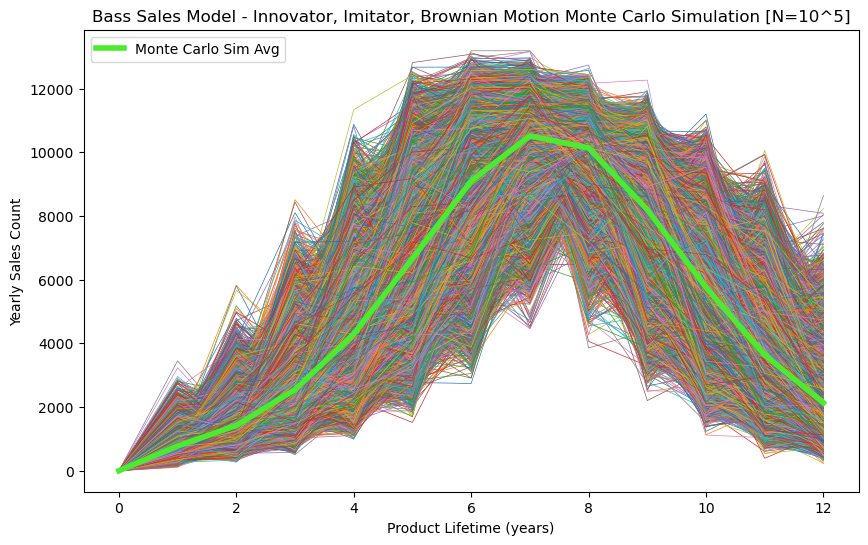


 [    0   840  1470  2110  4000  7590 10950 10530  9470  7790  5890] 
 [    0.           772.87542668  1424.82369296  2546.70123529
  4295.59208954  6660.86250082  9096.85177679 10516.60213501
 10137.55316597  8203.10707024  5760.50812857] 

Yearly Cumulative Sales Data: 
 [    0   840  2310  4420  8420 16010 26960 37490 46960 54750 60640]

Mean Cumulative Sales of 100000 Yearly Sales Simulations:
 [    0.           772.87542668  2197.69911964  4744.40035494
  9039.99244447 15700.8549453  24797.70672209 35314.3088571
 45451.86202307 53654.96909331 59415.47722188 63048.30442323
 65182.03970776]


R-Squared of Cumulative Sales MC Sim:  0.9967895470996933
R-Squared of Cumulative Sales LS Fit:  0.9208695756669373


Risidual Stadard Error of (MC Sim, LS Fit, Cum. Sales Data): 
 MC Sim: 		 1290.326708396372 
 Least Squares Fit: 	 6794.610155434629 
 Cum. Sales Data: 	 0.0


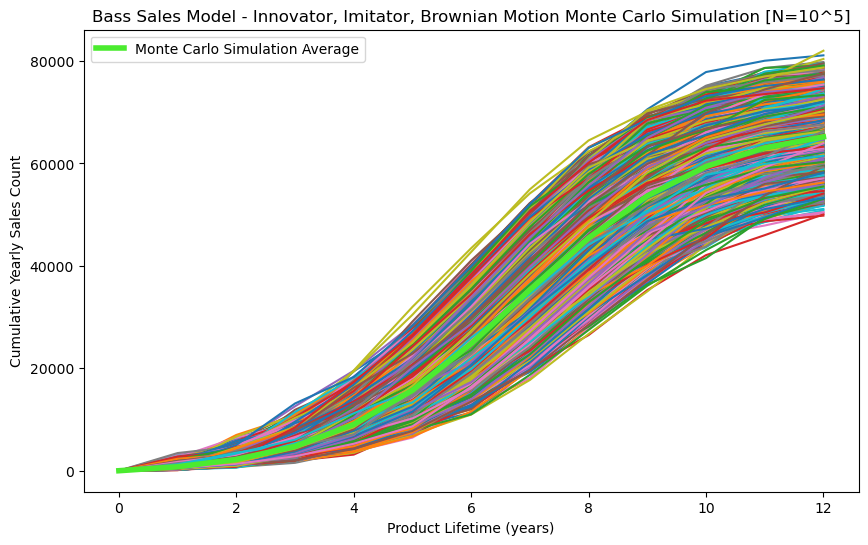


 [    0   840  2310  4420  8420 16010 26960 37490 46960 54750 60640] 
 [    0.           772.87542668  2197.69911964  4744.40035494
  9039.99244447 15700.8549453  24797.70672209 35314.3088571
 45451.86202307 53654.96909331 59415.47722188] 



In [56]:
import pandas as pd
#redefine t array for data
sales_d=np.array([840,1470,2110,4000, 7590, 10950, 10530, 9470, 7790, 5890])
#Hyundai Elantra Gen 1 Yearly Sales (Start 2007)
#sales_d=np.array([117760, 171605, 152741, 113368, 64363, 34454, 32236])
c_sales_d=np.cumsum(sales_d)
#time intervals
t= np.linspace(1.0, float(len(sales_d)), num=int(len(sales_d)))


###---Yearly---###
sim_s_avg = pd.DataFrame(sims_s)
#add mean of each time point over iterations
sim_s_avg['mean'] = sim_s_avg.mean(axis=0)
mean_s=np.array(sim_s_avg['mean'])
#if tint >1, loop here to average n=tint sim points to condense mean_s back to size of sales_0
mean_s = mean_s[0:len(sales_t)]
sales_0 = np.insert(sales_d,0,0)
print(str(tinterval) + "ly Sales Data: \n",sales_0)
print("\n\nMean Sales of", str(it), str(tinterval) + "ly Sales Simulations:\n", mean_s)
print("\n")
#r^2 of sales MC Sim
r2_sales_mc = r2(sales_0,mean_s[0:len(sales_0)])
print("R-Squared of Sales MC Sim: ", r2_sales_mc)
#r^2 of sales Least Squares Fit
print("R-Squared of Sales LS Fit: ", r2_sales)

#RSE
print("\n")
RSE_true = RSE(sales_d,sales_d)
RSE_sales = RSE(sales_d,sales_ti[0:len(sales_d)])
RSE_sales_mc = RSE(sales_0,mean_s[0:len(sales_0)])
print("Risidual Stadard Error of (MC Sim, LS Fit, Sales Data):",'\n MC Sim: \t\t',RSE_sales_mc,'\n Least Squares Fit: \t',RSE_sales,'\n Sales Data: \t\t',RSE_true)

#Plot average of simulations
plt.figure(figsize=(10,6))
for _ in range (it):
    plt.plot(sims_s[_], linewidth=0.5)

plt.plot(sim_s_avg['mean'], color='#4beb2f', linewidth=4, label='Monte Carlo Sim Avg');
#plt.plot(tp*tint, sales_pdf, color='red', linestyle='dashed')
#plt.scatter(t*tint,sales_d)
#print("!!!",t,sales)
plt.title('Bass Sales Model - Innovator, Imitator, Brownian Motion Monte Carlo Simulation [N=10^5]')
#plt.title("Average of " + str(it) + ' ' + str(tinterval) + 'ly Sales Simulations (Predict Last ' + str(look) +" Years)")
plt.xlabel('Product Lifetime (years)')
plt.ylabel('Yearly Sales Count')
plt.legend(loc="upper left")
#plt.legend((sim_s_avg['mean']),(['Monte Carlo Sim Avg']))#, 'Least Squares Fit', 'True'])
plt.savefig('sales_p_q_drift_brownian_mc_mean_' + date_time + '.png', bbox_inches='tight')
plt.show()
print("\n", sales_0,"\n",mean_s[0:len(sales_0)],"\n")


###---Cumulative---###

sim_f_avg = pd.DataFrame(sims_f)
#add mean of each time point over iterations
sim_f_avg['mean'] = sim_f_avg.mean(axis=0)
mean_f=np.array(sim_f_avg['mean'])
mean_f = mean_f[0:len(sales_t)]
c_sales_0 = np.insert(c_sales_d,0,0)
print(str(tinterval) + "ly Cumulative Sales Data: \n", c_sales_0)
print("\nMean Cumulative Sales of", str(it), str(tinterval) + "ly Sales Simulations:\n", mean_f)
print("\n")
#r^2 of cumulative sales MC Sim
r2_c_sales_mc = r2(c_sales_d,mean_f[1:len(c_sales_0)])
print("R-Squared of Cumulative Sales MC Sim: ", r2_c_sales_mc)
#r^2 of cumulative sales Least Squares Fit
print("R-Squared of Cumulative Sales LS Fit: ", r2_csales)

#RSE
print("\n")
RSE_c_true = RSE(c_sales_d,c_sales_d)
RSE_c_sales = RSE(c_sales_d,csales_i[0:len(c_sales_d)])
RSE_c_sales_mc = RSE(c_sales_0,mean_f[0:len(c_sales_0)])
print("Risidual Stadard Error of (MC Sim, LS Fit, Cum. Sales Data):",'\n MC Sim: \t\t',RSE_c_sales_mc,'\n Least Squares Fit: \t',RSE_c_sales,'\n Cum. Sales Data: \t',RSE_c_true)

plt.figure(figsize=(10,6))
for _ in range (it):
    plt.plot(sims_f[_], linewidth=1.5)

plt.plot(sim_f_avg['mean'], color='#4beb2f', linewidth=4, label='Monte Carlo Simulation Average');
# Uncomment to compare MC to Data & Least Squares Fit
#plt.plot(tp*tint, sales_cdf, color='red', linestyle='dashed', linewidth=3)
#plt.scatter(t*tint,c_sales_d)
plt.title('Bass Sales Model - Innovator, Imitator, Brownian Motion Monte Carlo Simulation [N=10^5]')
#plt.title("Average of Cumulative " + str(tinterval) + 'ly Sales Simulations (N = 10^5)') #(Predict Last ' + str(look) +" Years)")
plt.xlabel('Product Lifetime (years)')
plt.ylabel('Cumulative Yearly Sales Count')
plt.legend(loc="upper left")
#plt.legend((sim_f_avg['mean']),(['Monte Carlo Simulation Average'])) #, 'Least Squares Fit', 'True'])
plt.savefig('cumsales_p_q_drift_brownian_mc_mean_' + date_time + '.png', bbox_inches='tight')
plt.show()
print("\n", c_sales_0,"\n",mean_f[0:len(c_sales_0)],"\n")

#### We convert the arrays back into a pandas DataFrame, and compare the R-Squared Value of the Monte Carlo Simulation to the Least Squares Fit
#### The Data will be written to a CSV file in the output folder.

In [61]:
sales_lc_0 = np.insert(sales_ti,0,0)
csales_lc_0 = np.insert(csales_i,0,0)
data_dict = {"Sales Data" : sales_0, 
             "LS Fit Sales":np.round(sales_lc_0[0:len(sales_0)]), 
             "MC Sales (N="+str(it)+")" : np.round(mean_s[0:len(sales_0)]), 
             "Cumulative Sales Data" : c_sales_0, 
             "LS Fit Cumulative Sales" : np.round(csales_lc_0[0:len(c_sales_0)]), 
             "MC Cumulative Sales (N="+str(it)+")" : np.round(mean_f[0:len(c_sales_0)])}
df = pd.DataFrame(data_dict)


# #r^2 of Sales LC Fit & MC Sim
r2_sales_df_lc = r2(df["Sales Data"],df["LS Fit Sales"])
r2_sales_df_mc = r2(df["Sales Data"],df["MC Sales (N="+str(it)+")"])

# #r^2 of Cumulative Sales LC Fit & MC Sim
r2_csales_df_lc = r2(df["Cumulative Sales Data"],df["LS Fit Cumulative Sales"])
r2_csales_df_mc = r2(df["Cumulative Sales Data"],df["MC Cumulative Sales (N="+str(it)+")"])

# Build R^2 DataFrame
r2_list = [r2_sales_df_lc, r2_sales_df_mc, r2_csales_df_lc, r2_csales_df_mc]
r2_header = ["R2 Sales LC Fit", "R2 Sales MC Sim", "R2 Cumu. Sales LC Fit", "R2 Cumu. Sales MC Sim"]
df_r2 = pd.DataFrame(r2_list, index = r2_header)
df_r2.columns = ["Score"]


#Write to files
import os
from datetime import datetime
now = datetime.now() # current date and time
date_time = now.strftime("%m%d%Y_%H%M%S")
outpath = "output_"+ date_time
if not os.path.exists(outpath):
    os.makedirs(outpath)


df.to_csv(path_or_buf = outpath + "/Bass_MC_Data_" + str(look) + "_Yrs_Frcst.csv", sep=',')
df_r2.to_csv(path_or_buf = outpath + "/Bass_MC_Data_" + str(look) + "_Yrs_Frcst_r2.csv", sep=',')
df.to_excel(excel_writer = outpath + "/Bass_MC_Data_" + str(look) + "_Yrs_Frcst.xlsx", sheet_name='Sales Data')
df_r2.to_excel(excel_writer = outpath + "/Bass_MC_Data_" + str(look) + "_Yrs_Frcst_r2.xlsx", sheet_name='R-Squared')

df

,Sales Data,LS Fit Sales,MC Sales (N=100000),Cumulative Sales Data,LS Fit Cumulative Sales,MC Cumulative Sales (N=100000)
0,0,0.0,0.0,0,0.0,0.0
1,840,448.0,773.0,840,448.0,773.0
2,1470,839.0,1425.0,2310,1287.0,2198.0
3,2110,1543.0,2547.0,4420,2830.0,4744.0
4,4000,2757.0,4296.0,8420,5587.0,9040.0
5,7590,4672.0,6661.0,16010,10259.0,15701.0
6,10950,7244.0,9097.0,26960,17503.0,24798.0
7,10530,9803.0,10517.0,37490,27306.0,35314.0
8,9470,11060.0,10138.0,46960,38366.0,45452.0
9,7790,10174.0,8203.0,54750,48540.0,53655.0


In [62]:
df_r2

,Score
R2 Sales LC Fit,0.773068
R2 Sales MC Sim,0.967901
R2 Cumu. Sales LC Fit,0.930004
R2 Cumu. Sales MC Sim,0.997160


### __Why is this analysis ACTUALLY useful?__

### _Annual Sales Volume of a product is imperative for determining marketing resource deployment, project milestones, product profitability, R&D resource allocation & new version release._


---
## __Conclusion__

We notice a much better R-Squared value for both Monte Carlo Bass Diffusion Model Simulations when compared to the traditional least squares approach for fiiting the sales data.Like most statistical models, as the sample size grows, the accuracy of the model will increase. 

The Bass Diffusion Model is inherently good at forecasting the sales of durables, and it should be realized that it is not as accurate when predicting the sales volume on a monthly basis. 

Adaptations for the Bass Diffusion Model also exist. Often a product may have a new model released on a seasonal basis, for which the Generational Bass-Norton Diffusion Model can be applied. For disruptive products of innovation, market survey methods & customer pre-sale volume can be useful for determining the m & p coefficients, respectively. After a product is released, sentiment analysis of user feedback (reviews) can help more accurately determine the value of the q coefficient.

Implementing Monte Carlo Simulation in the Bass Diffusion Model is a powerful tool for producers to get an idea of their product’s life cycle before sales even begin. As a product ages, and sales data becomes more available, the yearly sales forecasted by the Bass Diffusion Model can become even more accurate, giving producers insights not available with traditional analytics. Taking this advantage even further, yearly sales can be forecasted with conservative/optimistic modes of consumer market response, painting a full picture of worst- & best-case scenarios.

#### _Writen by Sam Neubauer, Data Scientist, UpTahr Analytics_